# importing data/ cleaning/ get dataframe

In [71]:
import pandas as pd
import numpy as np
import time
from datetime import date
from matplotlib import pyplot
import statsmodels.api as sm
from pylab import rcParams
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#data = open("FG_STAID000160.txt")

In [3]:
data = pd.read_csv("FG_STAID000160.txt", skiprows=20)

In [4]:
col = data.columns.map(lambda x : x.replace(" ", "").replace(" ", "_").lower())

In [5]:
data.columns = col

In [6]:
data.columns

Index(['staid', 'souid', 'date', 'fg', 'q_fg'], dtype='object')

In [7]:
data = data.drop(["staid","souid","q_fg"], axis=1)

In [8]:
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d', errors='coerce')  

In [9]:
data.date = pd.to_datetime(data.date)
data.index = pd.DatetimeIndex(data.date)
w_dh = data.drop(["date"],axis=1)

In [10]:
w_dh = w_dh[:-78]

In [11]:
w_dh# cleaned data for wind avarage on given day in "Den Helder"

fg
date            
1906-01-01    67
1906-01-02    62
1906-01-03    36
1906-01-04    41
1906-01-05    41
1906-01-06   108
1906-01-07    77
1906-01-08    31
1906-01-09    57
1906-01-10    82
1906-01-11    62
1906-01-12    82
1906-01-13    62
1906-01-14    87
1906-01-15    87
1906-01-16   113
1906-01-17    77
1906-01-18    82
1906-01-19    93
1906-01-20    72
1906-01-21    62
1906-01-22    36
1906-01-23    15
1906-01-24    67
1906-01-25    72
1906-01-26    46
1906-01-27    62
1906-01-28    82
1906-01-29    72
1906-01-30    72
1906-01-31    41
1906-02-01    57
1906-02-02   108
1906-02-03    93
1906-02-04    67
1906-02-05    57
1906-02-06    15
1906-02-07    31
1906-02-08   103
1906-02-09    62
1906-02-10   118
1906-02-11    98
1906-02-12    36
1906-02-13    15
1906-02-14    26
1906-02-15    36
1906-02-16    77
1906-02-17    57
1906-02-18    46
1906-02-19    31
1906-02-20    72
1906-02-21    67
1906-02-22    26
1906-02-23    10
1906-02-24    21
1906-02-25    62
1906-02-26    57
1906-02-27    21
1906-02-28    72
1906-03-01    67
1906-03-02    46
1906-03-03    57
1906-03-04    46
1906-03-05    72
1906-03-06    77
1906-03-07    82
1906-03-08    93
1906-03-09   139
1906-03-10    36
1906-03-11    93
1906-03-12   154
1906-03-13   103
1906-03-14    31
1906-03-15    98
1906-03-16    77
1906-03-17    87
1906-03-18    41
1906-03-19    62
1906-03-20    51
1906-03-21    67
1906-03-22    41
1906-03-23    67
1906-03-24    51
1906-03-25    51
1906-03-26    77
1906-03-27    57
1906-03-28    26
1906-03-29    67
1906-03-30    41
1906-03-31    31
1906-04-01    31
1906-04-02    31
1906-04-03    31
1906-04-04    26
1906-04-05    15
1906-04-06    15
1906-04-07    15
1906-04-08    15
1906-04-09    51
1906-04-10    36
1906-04-11    26
1906-04-12    10
1906-04-13    26
1906-04-14    72
1906-04-15    15
1906-04-16    26
1906-04-17    36
1906-04-18   103
1906-04-19    93
1906-04-20    62
1906-04-21    87
1906-04-22    51
1906-04-23    57
1906-04-24    46
1906-04-25    36
1906-04-26    46
1906-04-27    46
1906-04-28    51
1906-04-29    31
1906-04-30    31
1906-05-01    51
1906-05-02    26
1906-05-03    51
1906-05-04    46
1906-05-05    15
1906-05-06    26
1906-05-07    21
1906-05-08    31
1906-05-09    26
1906-05-10    41
1906-05-11    21
1906-05-12    31
1906-05-13    41
1906-05-14    62
1906-05-15    82
1906-05-16    21
1906-05-17    21
1906-05-18    15
1906-05-19    57
1906-05-20    77
1906-05-21    82
1906-05-22    26
1906-05-23    31
1906-05-24    26
1906-05-25    51
1906-05-26    31
1906-05-27    46
1906-05-28    57
1906-05-29    51
1906-05-30    51
1906-05-31    31
1906-06-01    46
1906-06-02    51
1906-06-03    77
1906-06-04    82
1906-06-05    51
1906-06-06    15
1906-06-07    21
1906-06-08    31
1906-06-09    41
1906-06-10    51
1906-06-11    46
1906-06-12    31
1906-06-13    57
1906-06-14    82
1906-06-15    31
1906-06-16    15
1906-06-17    15
1906-06-18    26
1906-06-19    21
1906-06-20    15
1906-06-21    21
1906-06-22    10
1906-06-23    26
1906-06-24    21
1906-06-25    62
1906-06-26    62
1906-06-27    46
1906-06-28    26
1906-06-29   103
1906-06-30    57
1906-07-01    26
1906-07-02    46
1906-07-03    57
1906-07-04    57
1906-07-05    57
1906-07-06    21
1906-07-07     5
1906-07-08    21
1906-07-09    21
1906-07-10    21
1906-07-11    67
1906-07-12    62
1906-07-13    31
1906-07-14    46
1906-07-15    67
1906-07-16    72
1906-07-17    51
1906-07-18    31
1906-07-19    57
1906-07-20    57
1906-07-21    57
1906-07-22    26
1906-07-23    10
1906-07-24    31
1906-07-25    26
1906-07-26    57
1906-07-27    41
1906-07-28    15
1906-07-29    15
1906-07-30    26
1906-07-31    21
1906-08-01    15
1906-08-02    26
1906-08-03    57
1906-08-04    72
1906-08-05    57
1906-08-06    31
1906-08-07    21
1906-08-08     5
1906-08-09    51
1906-08-10    36
1906-08-11    46
1906-08-12    21
1906-08-13    26
1906-08-14    21
1906-08-15    62
1906-08-16    67
1906-08-17    51
1906-08-18    41
1906-08-19    51
1906-08-20    82
1906-08-21    41
1906-08-22    36
19

In [12]:
# make fuction for importing and cleaning the data. 

In [13]:
def clean_data (t):
    info = pd.read_csv(t, skiprows=20)
    col = info.columns.map(lambda x : x.replace(" ", "").replace(" ", "_").lower())
    info.columns = col
    info['date'] = pd.to_datetime(info['date'], format='%Y%m%d', errors='coerce') 
    info.date = pd.to_datetime(info.date)
    info.index = pd.DatetimeIndex(info.date)
    info_clean = info.drop(["staid","souid","date"],axis=1)
    info_clean = info_clean[:-78] # last rows contain unusable values so we dont include them
    
    return info_clean

In [14]:
# overview of datasets to clean and concat

# Den Helder        -Windspeed/w_dh  -WindDirection/d_dh  -AvarageTemp/t_dh -MeanSealevelPressure/p_dh
# Vlissingen        -Windspeed/w_vl  -WindDirection/d_vl  -AvarageTemp/t_vl -MeanSealevelPressure/p_vl
# Hoek van Holland  -Windspeed/w_hh  -WindDirection/d_hh  -AvarageTemp/t_hh -MeanSealevelPressure/p_hh
# Ijmuiden          -Windspeed/w_ij  -WindDirection/d_ij  

In [15]:
# test the function on a new location

data_wvl = open("FG_STAID000166.txt")
data_whh = open("FG_STAID000602.txt")
data_wij = open("FG_STAID003176.txt")

#Wind direction
data_ddh = open("DD_STAID000160.txt")
data_dvl = open("DD_STAID000166.txt")
data_dhh = open("DD_STAID000602.txt")
data_dij = open("DD_STAID003176.txt")

#meanTemp
data_tdh = open("TG_STAID000160.txt")
data_tvl = open("TG_STAID000166.txt")
data_thh = open("TG_STAID000602.txt")

#meanPressure
data_pdh = open("PP_STAID000160.txt")
data_pvl = open("PP_STAID000166.txt")
data_ohh = open("PP_STAID000602.txt")

In [16]:
alldata= [data_wvl,
data_whh,
data_wij,

#Wind direction
data_ddh,
data_dvl,
data_dhh,
data_dij,

#meanTemp
data_tdh,
data_tvl,
data_thh,

#meanPressure
data_pdh,
data_pvl,
data_ohh,]

alldata

[<_io.TextIOWrapper name='FG_STAID000166.txt' mode='r' encoding='cp1252'>,
 <_io.TextIOWrapper name='FG_STAID000602.txt' mode='r' encoding='cp1252'>,
 <_io.TextIOWrapper name='FG_STAID003176.txt' mode='r' encoding='cp1252'>,
 <_io.TextIOWrapper name='DD_STAID000160.txt' mode='r' encoding='cp1252'>,
 <_io.TextIOWrapper name='DD_STAID000166.txt' mode='r' encoding='cp1252'>,
 <_io.TextIOWrapper name='DD_STAID000602.txt' mode='r' encoding='cp1252'>,
 <_io.TextIOWrapper name='DD_STAID003176.txt' mode='r' encoding='cp1252'>,
 <_io.TextIOWrapper name='TG_STAID000160.txt' mode='r' encoding='cp1252'>,
 <_io.TextIOWrapper name='TG_STAID000166.txt' mode='r' encoding='cp1252'>,
 <_io.TextIOWrapper name='TG_STAID000602.txt' mode='r' encoding='cp1252'>,
 <_io.TextIOWrapper name='PP_STAID000160.txt' mode='r' encoding='cp1252'>,
 <_io.TextIOWrapper name='PP_STAID000166.txt' mode='r' encoding='cp1252'>,
 <_io.TextIOWrapper name='PP_STAID000602.txt' mode='r' encoding='cp1252'>]

In [17]:
dataset_all = w_dh

for d in alldata:
    myinfo = clean_data(d)
    dataset_all = pd.concat([dataset_all, myinfo], axis=1)

In [18]:
print(dataset_all.shape)
dataset_all.columns

(42322, 27)


Index(['fg', 'fg', 'q_fg', 'fg', 'q_fg', 'fg', 'q_fg', 'dd', 'q_dd', 'dd',
       'q_dd', 'dd', 'q_dd', 'dd', 'q_dd', 'tg', 'q_tg', 'tg', 'q_tg', 'tg',
       'q_tg', 'pp', 'q_pp', 'pp', 'q_pp', 'pp', 'q_pp'],
      dtype='object')

In [19]:
col_alldata = ['dh_wind', 'vl_wind', 'q_fg', 'hh_wind', 'q_fg', 'ij_wind', 'q_fg', 'dh_direc', 'q_dd', 'vl_direc',
       'q_dd', 'hh_direc', 'q_dd', 'ij_direc', 'q_dd', 'dh_temp', 'q_tg', 'vl_temp', 'q_tg', 'hh_temp',
       'q_tg', 'dh_pres', 'q_pp', 'vl_pres', 'q_pp', 'ij_pres', 'q_pp']

In [20]:
dataset_all.columns = col_alldata

dataset_all.head(10)

dataset_all.isna().sum()/len(dataset_all)

dh_wind     0.000000
vl_wind     0.000000
q_fg        0.000000
hh_wind     0.560961
q_fg        0.560961
ij_wind     0.560961
q_fg        0.560961
dh_direc    0.000000
q_dd        0.000000
vl_direc    0.000000
q_dd        0.000000
hh_direc    0.560961
q_dd        0.560961
ij_direc    0.560961
q_dd        0.560961
dh_temp     0.000000
q_tg        0.000000
vl_temp     0.000000
q_tg        0.000000
hh_temp     0.560961
q_tg        0.560961
dh_pres     0.000000
q_pp        0.000000
vl_pres     0.000000
q_pp        0.000000
ij_pres     0.560961
q_pp        0.560961
dtype: float64

In [21]:
#all the files that contain NaN values are cells pre-dating 1971 / only in Hoek v Holland and Ijmuiden. 
#So ill choose to use only data after this date, hence dropping the NaN values

dataset_all = dataset_all.dropna()

In [22]:
print(dataset_all.shape)
dataset_all.isna().sum()

(18581, 27)


dh_wind     0
vl_wind     0
q_fg        0
hh_wind     0
q_fg        0
ij_wind     0
q_fg        0
dh_direc    0
q_dd        0
vl_direc    0
q_dd        0
hh_direc    0
q_dd        0
ij_direc    0
q_dd        0
dh_temp     0
q_tg        0
vl_temp     0
q_tg        0
hh_temp     0
q_tg        0
dh_pres     0
q_pp        0
vl_pres     0
q_pp        0
ij_pres     0
q_pp        0
dtype: int64

In [23]:
dataset_all.tail(10) #see if all NaN values dropped as expected

dh_wind  vl_wind  q_fg  hh_wind  q_fg  ij_wind  q_fg  dh_direc  \
date                                                                         
2021-11-05       45       49     0     70.0   0.0     76.0   0.0       288   
2021-11-06       91       92     0     88.0   0.0    129.0   0.0       245   
2021-11-07       79       72     0    117.0   0.0    126.0   0.0       290   
2021-11-08       34       35     0     48.0   0.0     62.0   0.0       283   
2021-11-09       63       60     0     66.0   0.0     74.0   0.0       194   
2021-11-10       50       40     0     47.0   0.0     59.0   0.0       209   
2021-11-11       38       36     0     42.0   0.0     53.0   0.0       214   
2021-11-12       59       79     0     81.0   0.0     73.0   0.0       178   
2021-11-13       20       51     0     59.0   0.0     44.0   0.0       312   
2021-11-14       41       38     0     44.0   0.0     52.0   0.0        73   

            q_dd  vl_direc  q_dd  hh_direc  q_dd  ij_direc  q_dd  dh_temp  \
date                                                                        
2021-11-05     0       268     0     303.0   0.0     295.0   0.0      108   
2021-11-06     0       209     0     232.0   0.0     244.0   0.0      123   
2021-11-07     0       280     0     294.0   0.0     292.0   0.0      108   
2021-11-08     0       241     0     267.0   0.0     273.0   0.0       95   
2021-11-09     0       183     0     191.0   0.0     186.0   0.0       96   
2021-11-10     0       190     0     193.0   0.0     198.0   0.0      112   
2021-11-11     0       183     0     190.0   0.0     196.0   0.0      119   
2021-11-12     0       178     0     187.0   0.0     177.0   0.0       93   
2021-11-13     0       282     0     309.0   0.0     310.0   0.0      114   
2021-11-14     0        38     0      70.0   0.0      79.0   0.0       98   

            q_tg  vl_temp  q_tg  hh_temp  q_tg  dh_pres  q_pp  vl_pres  q_pp  \
date                                                                           
2021-11-05     0       96     0    108.0   0.0    10217     0    10241     0   
2021-11-06     0      101     0    116.0   0.0    10204     0    10245     0   
2021-11-07     0      114     0    113.0   0.0    10145     0    10186     0   
2021-11-08     0       96     0    101.0   0.0    10214     0    10232     0   
2021-11-09     0       97     0     95.0   0.0    10235     0    10251     0   
2021-11-10     0       94     0    102.0   0.0    10228     0    10240     0   
2021-11-11     0      103     0    106.0   0.0    10225     0    10235     0   
2021-11-12     0       95     0     95.0   0.0    10127     0    10142     0   
2021-11-13     0      114     0    119.0   0.0    10114     0    10127     0   
2021-11-14     0      103     0    104.0   0.0    10244     0    10228     0   

            ij_pres  q_pp  
date                       
2021-11-05  10233.0   0.0  
2021-11-06  10231.0   0.0  
2021-11-07  10172.0   0.0  
2021-11-08  10227.0   0.0  
2021-11-09  10249.0   0.0  
2021-11-10  10238.0   0.0  
2021-11-11  10233.0   0.0  
2021-11-12  10138.0   0.0  
2021-11-13  10121.0   0.0  
2021-11-14  10234.0   0.0

In [24]:
# after replacing all -9999 values with NaN values i see that 'hh_temp' column is missing 20% of its data. 
# Because it is temperature data i will choose to drop this column. We still have more temp data from the other places

dataset_all = dataset_all.replace(to_replace=-9999, value= np.nan)
dataset_all = dataset_all.drop(['hh_temp',"q_fg","q_dd","q_tg","q_pp"], axis=1)

In [25]:
dataset_all.isna().sum()

dh_wind       0
vl_wind       0
hh_wind      71
ij_wind      18
dh_direc      0
vl_direc      0
hh_direc     76
ij_direc    105
dh_temp       3
vl_temp       1
dh_pres       0
vl_pres       0
ij_pres      54
dtype: int64

In [26]:
# im goign to replace the NaN with .interpolate( method='linear', axis=0, inplace = True)

dataset_all = dataset_all.interpolate(method='linear', axis=0, inplace = False)

In [27]:
#the last NaN is the first value of a collumn so we will fill it again but now using the 'bfill method'

data_wind = dataset_all.interpolate(method='bfill', axis=0, inplace = False)

In [28]:
# all cleaned up
data_wind.isna().sum()

dh_wind     0
vl_wind     0
hh_wind     0
ij_wind     0
dh_direc    0
vl_direc    0
hh_direc    0
ij_direc    0
dh_temp     0
vl_temp     0
dh_pres     0
vl_pres     0
ij_pres     0
dtype: int64

In [29]:
# The cleaned and completed dataset
print(data_wind.dtypes)
data_wind.head(25)

dh_wind       int64
vl_wind       int64
hh_wind     float64
ij_wind     float64
dh_direc      int64
vl_direc      int64
hh_direc    float64
ij_direc    float64
dh_temp     float64
vl_temp     float64
dh_pres       int64
vl_pres       int64
ij_pres     float64
dtype: object


dh_wind  vl_wind  hh_wind  ij_wind  dh_direc  vl_direc  hh_direc  \
date                                                                           
1971-01-01       51       51     41.0     62.0       204       231     205.0   
1971-01-02       46       46     46.0     62.0       294       235     260.0   
1971-01-03       57       36     31.0     46.0        68       228     140.0   
1971-01-04       57       31     36.0     46.0       182       169     171.0   
1971-01-05       46       46     41.0     57.0       174       163     157.0   
1971-01-06       51       62     51.0     62.0       157       171     159.0   
1971-01-07      123       98     87.0    113.0       190       194     188.0   
1971-01-08       93       57     67.0     87.0       194       190     195.0   
1971-01-09       82       51     57.0     72.0       190       192     192.0   
1971-01-10       51       31     36.0     46.0       148       104     125.0   
1971-01-11       72       62     57.0     77.0       109       105     119.0   
1971-01-12       36       36     36.0     57.0       161       180     172.0   
1971-01-13       31       31     31.0     46.0       109        89     100.0   
1971-01-14       41       36     36.0     51.0       129       124     135.0   
1971-01-15       46       36     41.0     51.0       192       194     202.0   
1971-01-16       46       51     57.0     82.0       223       210     224.0   
1971-01-17       46       41     46.0     62.0       175       176     179.0   
1971-01-18       62       67     57.0     77.0       173       182     180.0   
1971-01-19      108      103    103.0    129.0       205       213     211.0   
1971-01-20       87       72     72.0    108.0       206       195     203.0   
1971-01-21       51       82     72.0    108.0       137       141     146.0   
1971-01-22       41       72     62.0     72.0       117       181     170.0   
1971-01-23      113      123    113.0    144.0       187       190     191.0   
1971-01-24      149      123    129.0    159.0       222       218     223.0   
1971-01-25      123      113    103.0    134.0       191       196     192.0   

            ij_direc  dh_temp  vl_temp  dh_pres  vl_pres  ij_pres  
date                                                               
1971-01-01     200.0    -18.0    -19.0    10111    10138  10150.0  
1971-01-02     286.0     24.0     13.0    10132    10154  10150.0  
1971-01-03      48.0    -16.0    -19.0    10164    10166  10165.0  
1971-01-04     172.0    -31.0    -31.0    10200    10212  10215.0  
1971-01-05     167.0    -47.0    -34.0    10198    10199  10205.0  
1971-01-06     149.0    -65.0    -43.0    10235    10232  10238.0  
1971-01-07     187.0     25.0     31.0    10203    10229  10226.0  
1971-01-08     190.0     48.0     38.0    10210    10227  10227.0  
1971-01-09     183.0     41.0     28.0    10241    10260  10260.0  
1971-01-10     126.0     43.0     26.0    10273    10268  10276.0  
1971-01-11     110.0     26.0     31.0    10175    10154  10165.0  
1971-01-12     165.0     11.0     27.0    10165    10166  10171.0  
1971-01-13     107.0     19.0     28.0    10225    10215  10224.0  
1971-01-14     125.0      2.0     21.0    10166    10160  10166.0  
1971-01-15     197.0     31.0     34.0    10132    10143  10144.0  
1971-01-16     222.0     40.0     41.0    10100    10124  10119.0  
1971-01-17     171.0     38.0     42.0    10084    10090  10092.0  
1971-01-18     168.0     26.0     40.0    10038    10044  10045.0  
1971-01-19     210.0     59.0     67.0     9906     9937   9928.0  
1971-01-20     206.0     50.0     46.0     9914     9935   9931.0  
1971-01-21     137.0     38.0     49.0     9843     9822   9834.0  
1971-01-22     140.0     35.0     52.0     9847     9841   9846.0  
1971-01-23     188.0     63.0     70.0     9829     9847   9844.0  
1971-01-24     220.0     63.0     65.0     9886     9935   9921.0  
1971-01-25     196.0     66.0     69.0     9903     9920   9918.0

In [30]:
# i want to have the wind strength in km/h from m/s (*0,36)

In [31]:
data_wind["dh_wind_kmph"] = round(data_wind["dh_wind"]*.36, 2)
data_wind["vl_wind_kmph"] = round(data_wind["vl_wind"]*.36, 2)
data_wind["hh_wind_kmph"] = round(data_wind["hh_wind"]*.36, 2)
data_wind["ij_wind_kmph"] = round(data_wind["ij_wind"]*.36, 2) 

In [32]:
#also i want the temp to go from 0.1C per unit to 1C per unit (/10)

In [33]:
data_wind["dh_temp_c"] = data_wind["dh_temp"]/10 
data_wind["vl_temp_c"] = data_wind["vl_temp"]/10 

In [34]:
data_wind.head(20)

dh_wind  vl_wind  hh_wind  ij_wind  dh_direc  vl_direc  hh_direc  \
date                                                                           
1971-01-01       51       51     41.0     62.0       204       231     205.0   
1971-01-02       46       46     46.0     62.0       294       235     260.0   
1971-01-03       57       36     31.0     46.0        68       228     140.0   
1971-01-04       57       31     36.0     46.0       182       169     171.0   
1971-01-05       46       46     41.0     57.0       174       163     157.0   
1971-01-06       51       62     51.0     62.0       157       171     159.0   
1971-01-07      123       98     87.0    113.0       190       194     188.0   
1971-01-08       93       57     67.0     87.0       194       190     195.0   
1971-01-09       82       51     57.0     72.0       190       192     192.0   
1971-01-10       51       31     36.0     46.0       148       104     125.0   
1971-01-11       72       62     57.0     77.0       109       105     119.0   
1971-01-12       36       36     36.0     57.0       161       180     172.0   
1971-01-13       31       31     31.0     46.0       109        89     100.0   
1971-01-14       41       36     36.0     51.0       129       124     135.0   
1971-01-15       46       36     41.0     51.0       192       194     202.0   
1971-01-16       46       51     57.0     82.0       223       210     224.0   
1971-01-17       46       41     46.0     62.0       175       176     179.0   
1971-01-18       62       67     57.0     77.0       173       182     180.0   
1971-01-19      108      103    103.0    129.0       205       213     211.0   
1971-01-20       87       72     72.0    108.0       206       195     203.0   

            ij_direc  dh_temp  vl_temp  dh_pres  vl_pres  ij_pres  \
date                                                                
1971-01-01     200.0    -18.0    -19.0    10111    10138  10150.0   
1971-01-02     286.0     24.0     13.0    10132    10154  10150.0   
1971-01-03      48.0    -16.0    -19.0    10164    10166  10165.0   
1971-01-04     172.0    -31.0    -31.0    10200    10212  10215.0   
1971-01-05     167.0    -47.0    -34.0    10198    10199  10205.0   
1971-01-06     149.0    -65.0    -43.0    10235    10232  10238.0   
1971-01-07     187.0     25.0     31.0    10203    10229  10226.0   
1971-01-08     190.0     48.0     38.0    10210    10227  10227.0   
1971-01-09     183.0     41.0     28.0    10241    10260  10260.0   
1971-01-10     126.0     43.0     26.0    10273    10268  10276.0   
1971-01-11     110.0     26.0     31.0    10175    10154  10165.0   
1971-01-12     165.0     11.0     27.0    10165    10166  10171.0   
1971-01-13     107.0     19.0     28.0    10225    10215  10224.0   
1971-01-14     125.0      2.0     21.0    10166    10160  10166.0   
1971-01-15     197.0     31.0     34.0    10132    10143  10144.0   
1971-01-16     222.0     40.0     41.0    10100    10124  10119.0   
1971-01-17     171.0     38.0     42.0    10084    10090  10092.0   
1971-01-18     168.0     26.0     40.0    10038    10044  10045.0   
1971-01-19     210.0     59.0     67.0     9906     9937   9928.0   
1971-01-20     206.0     50.0     46.0     9914     9935   9931.0   

            dh_wind_kmph  vl_wind_kmph  hh_wind_kmph  ij_wind_kmph  dh_temp_c  \
date                                                                            
1971-01-01         18.36         18.36         14.76         22.32       -1.8   
1971-01-02         16.56         16.56         16.56         22.32        2.4   
1971-01-03         20.52         12.96         11.16         16.56       -1.6   
1971-01-04         20.52         11.16         12.96         16.56       -3.1   
1971-01-05         16.56         16.56         14.76         20.52       -4.7   
1971-01-06         18.36         22.32         18.36         22.32       -6.5   
1971-01-07         44.28         35.28         31.32         40.68        2.5   
197

In [35]:
# i also want to convert the degrees of wind to their respectable direction as a catagorical.

In [36]:
def wind_cat(w):
    if w > 0 and w <= 22.5:
        return 'S'
    elif w > 22.5 and w <= 45:
        return 'SSW'
    elif w > 45 and w <= 67.5:
        return 'SW'
    elif w > 67.5 and w <= 90:
        return 'WSW'
    elif w > 90 and w <= 112.5:
        return 'W'
    elif w > 112.5 and w <= 135:
        return 'WNW'
    elif w > 135 and w <= 157.5:
        return 'NW'
    elif w > 157.5 and w <= 180:
        return 'NNW'
    elif w > 180 and w <= 202.5:
        return 'N'    
    elif w > 202.5 and w <= 225:
        return 'NNE'    
    elif w > 225 and w <= 247.5:
        return 'NE'    
    elif w > 247.5 and w <= 270:
        return 'ENE'    
    elif w > 270 and w <= 292.5:
        return 'E'    
    elif w > 292.5 and w <= 315:
        return 'ESE'    
    elif w > 315 and w <= 337.5:
        return 'SE'    
    elif w > 337.5 and w <= 360:
        return 'SSE'    
    return w_clean

In [37]:
#testing the fuction. Looks good so ill apply it.

# data_wind_test= data_wind[["dh_direc"]]

# data_wind_test["wind_d_test"] = data_wind["dh_direc"].apply(wind_cat)

# data_wind_test

In [38]:
data_wind["dh_wind_direct"] = data_wind["dh_wind"].apply(wind_cat)
data_wind["vl_wind_direct"] = data_wind["vl_wind"].apply(wind_cat)
data_wind["hh_wind_direct"] = data_wind["hh_wind"].apply(wind_cat)
data_wind["ij_wind_direct"] = data_wind["ij_wind"].apply(wind_cat)

In [39]:
data_wind.head()

dh_wind  vl_wind  hh_wind  ij_wind  dh_direc  vl_direc  hh_direc  \
date                                                                           
1971-01-01       51       51     41.0     62.0       204       231     205.0   
1971-01-02       46       46     46.0     62.0       294       235     260.0   
1971-01-03       57       36     31.0     46.0        68       228     140.0   
1971-01-04       57       31     36.0     46.0       182       169     171.0   
1971-01-05       46       46     41.0     57.0       174       163     157.0   

            ij_direc  dh_temp  vl_temp  dh_pres  vl_pres  ij_pres  \
date                                                                
1971-01-01     200.0    -18.0    -19.0    10111    10138  10150.0   
1971-01-02     286.0     24.0     13.0    10132    10154  10150.0   
1971-01-03      48.0    -16.0    -19.0    10164    10166  10165.0   
1971-01-04     172.0    -31.0    -31.0    10200    10212  10215.0   
1971-01-05     167.0    -47.0    -34.0    10198    10199  10205.0   

            dh_wind_kmph  vl_wind_kmph  hh_wind_kmph  ij_wind_kmph  dh_temp_c  \
date                                                                            
1971-01-01         18.36         18.36         14.76         22.32       -1.8   
1971-01-02         16.56         16.56         16.56         22.32        2.4   
1971-01-03         20.52         12.96         11.16         16.56       -1.6   
1971-01-04         20.52         11.16         12.96         16.56       -3.1   
1971-01-05         16.56         16.56         14.76         20.52       -4.7   

            vl_temp_c dh_wind_direct vl_wind_direct hh_wind_direct  \
date                                                                 
1971-01-01       -1.9             SW             SW            SSW   
1971-01-02        1.3             SW             SW             SW   
1971-01-03       -1.9             SW            SSW            SSW   
1971-01-04       -3.1             SW            SSW            SSW   
1971-01-05       -3.4             SW             SW            SSW   

           ij_wind_direct  
date                       
1971-01-01             SW  
1971-01-02             SW  
1971-01-03             SW  
1971-01-04             SW  
1971-01-05             SW

# Getting information from the data

In [40]:
# first i want to have subsets on the 4 different parameters

wind   = data_wind[["dh_wind","vl_wind","hh_wind","ij_wind"]]
direct = data_wind[["dh_direc","vl_direc","hh_direc","ij_direc"]]
temp   = data_wind[["dh_temp","vl_temp",]]
pres   = data_wind[["dh_pres","vl_pres","ij_pres"]]

subset = [wind,direct,temp,pres]

mean : 57.968516226252625


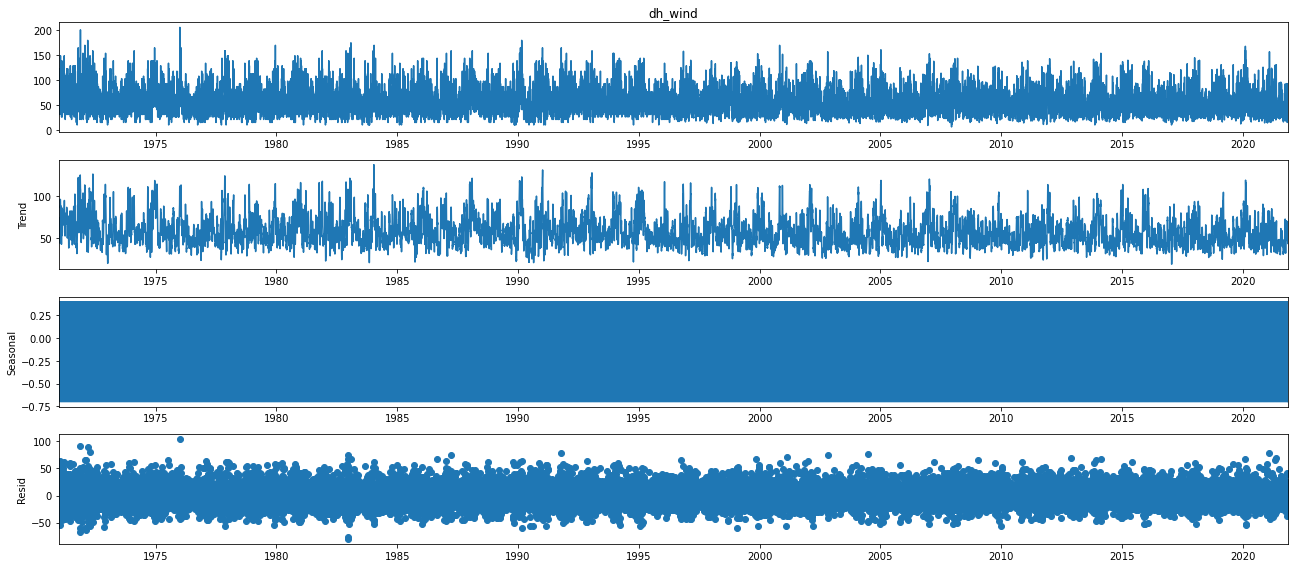

In [75]:
print('mean :' , data_wind.dh_wind.mean())

rcParams['figure.figsize'] = 18, 8
res = sm.tsa.seasonal_decompose(data_wind.dh_wind, model = 'additive')
resplot = res.plot()

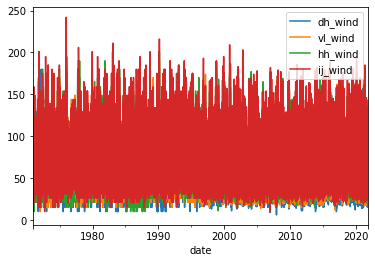

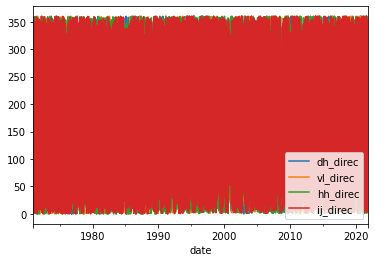

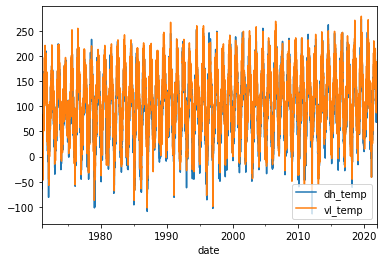

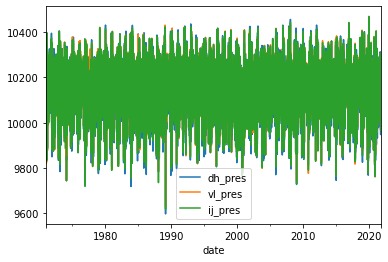

In [42]:
for s in subset:
    s.plot()
    pyplot.show()

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

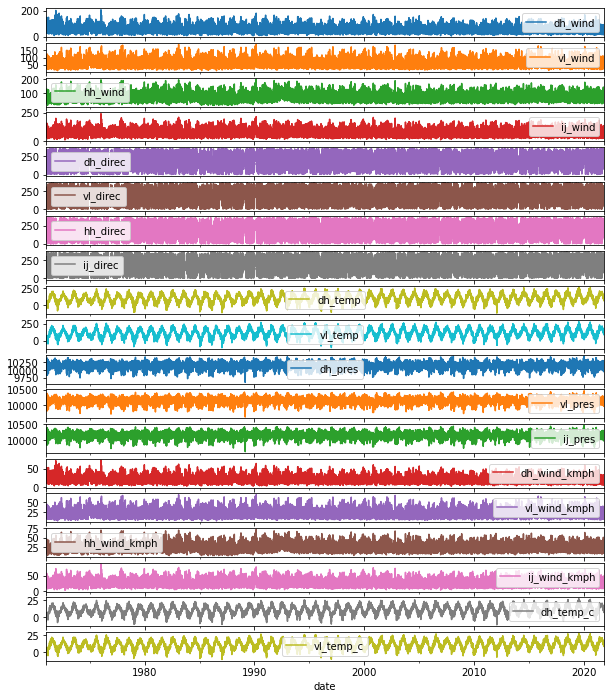

In [43]:
data_wind.plot(subplots=True, figsize=(10, 12))

NameError: name 'plt' is not defined

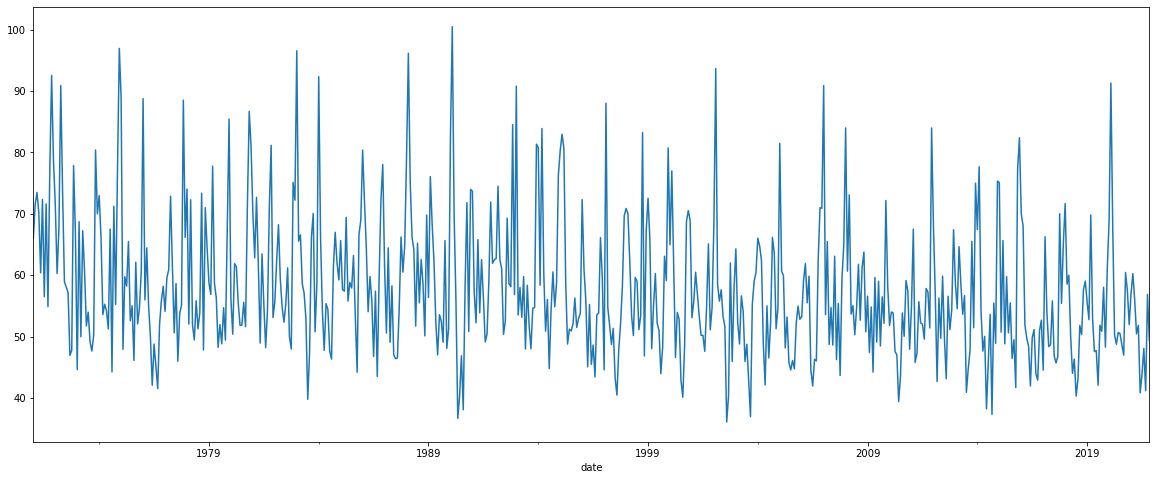

In [68]:
wind_month_avg = data_wind['dh_wind'].resample('MS').mean()
wind_month_avg.plot(figsize = (20, 8))
plt.show()

In [86]:
wind_2 = data_wind.loc['2021-01-01':'2021-12-31']

NameError: name 'plt' is not defined

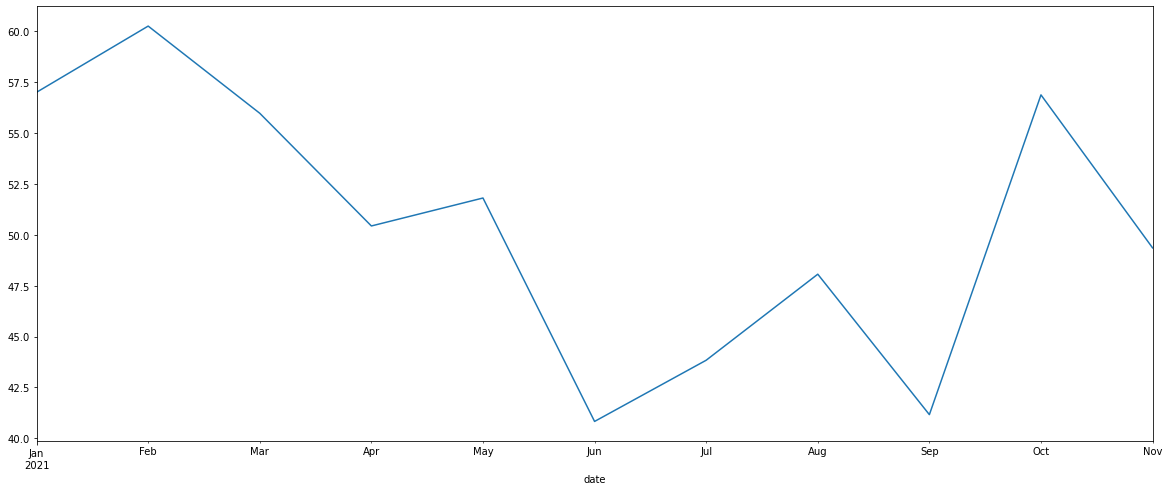

In [87]:
wind_month_avg_2 = wind_2['dh_wind'].resample('MS').mean()
wind_month_avg_2.plot(figsize = (20, 8))
plt.show()

In [ ]:
#in plot above i can see a seasonality in the data. 
#towards the end of the year it seams to be a higher value than earlier in the year.

In [44]:
#decided on doing further analisys in Tableau.

In [45]:
data_wind.dtypes

dh_wind             int64
vl_wind             int64
hh_wind           float64
ij_wind           float64
dh_direc            int64
vl_direc            int64
hh_direc          float64
ij_direc          float64
dh_temp           float64
vl_temp           float64
dh_pres             int64
vl_pres             int64
ij_pres           float64
dh_wind_kmph      float64
vl_wind_kmph      float64
hh_wind_kmph      float64
ij_wind_kmph      float64
dh_temp_c         float64
vl_temp_c         float64
dh_wind_direct     object
vl_wind_direct     object
hh_wind_direct     object
ij_wind_direct     object
dtype: object

In [46]:
# set everything to float for compatebillity with tableau
data_wind[['dh_wind', 'vl_wind', 'hh_wind', 'ij_wind', 'dh_direc', 'vl_direc','hh_direc', 'ij_direc', 'dh_temp', 'vl_temp', 'dh_pres', 'vl_pres','ij_pres']] = data_wind[['dh_wind', 'vl_wind', 'hh_wind', 'ij_wind', 'dh_direc', 'vl_direc','hh_direc', 'ij_direc', 'dh_temp', 'vl_temp', 'dh_pres', 'vl_pres','ij_pres']].astype('int64')

In [47]:
data_wind.dtypes

dh_wind             int64
vl_wind             int64
hh_wind             int64
ij_wind             int64
dh_direc            int64
vl_direc            int64
hh_direc            int64
ij_direc            int64
dh_temp             int64
vl_temp             int64
dh_pres             int64
vl_pres             int64
ij_pres             int64
dh_wind_kmph      float64
vl_wind_kmph      float64
hh_wind_kmph      float64
ij_wind_kmph      float64
dh_temp_c         float64
vl_temp_c         float64
dh_wind_direct     object
vl_wind_direct     object
hh_wind_direct     object
ij_wind_direct     object
dtype: object

In [50]:
data_wind.to_csv(r'WindData.csv')

In [ ]:
wind_dir = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']
degrees  = np.arange(0, 360, 22.5)

wind_dir_deg = dict((zip(wind_dir,degrees)))

wind_dir_deg

# Modeling

mean : 50.5377358490566


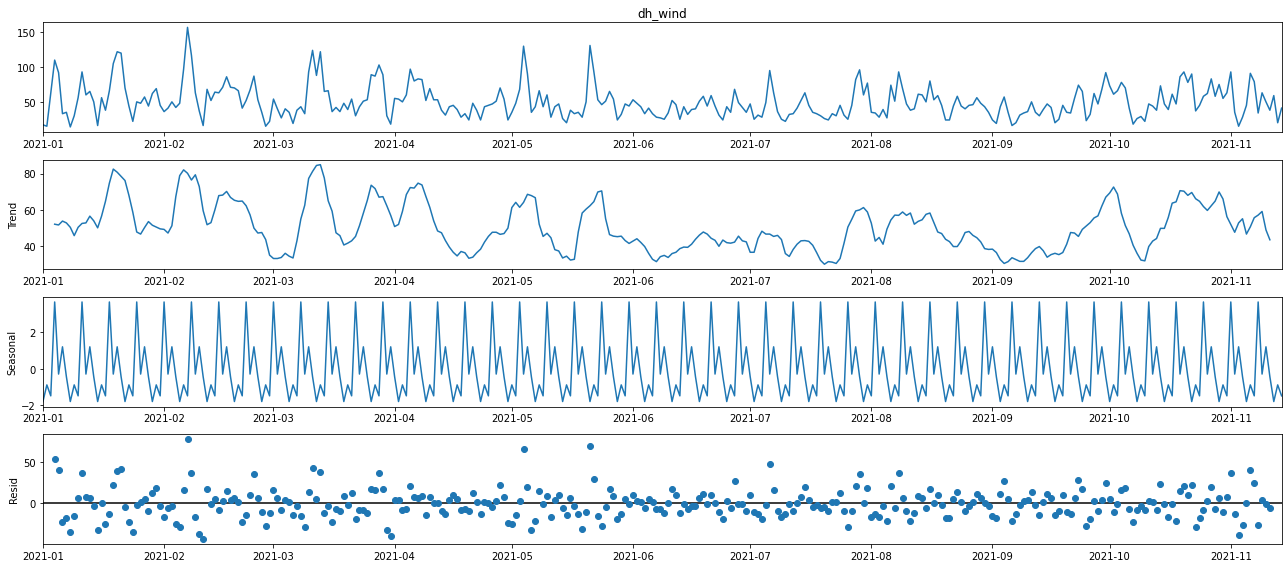

In [88]:
# wind in the last year

print('mean :' , wind_2.dh_wind.mean())
rcParams['figure.figsize'] = 18, 8
res = sm.tsa.seasonal_decompose(wind_2.dh_wind, model = 'additive')
resplot = res.plot()

In [ ]:
# we roughly see a weekly seasonality come back in the data. This might be interesting to look into.

# it would be interesting to use a SARIMA model to explore the results because of the seasonality.
# Because the time preassure i wont be able to explore this more and have to do this some other time.

In [114]:
# I do a ADF to check stationarity of the data.
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)

        
adf_test(wind_2["dh_wind"])

1. ADF :  -5.0716522957195584
2. P-Value :  1.598057221342518e-05
3. Num Of Lags :  7
4. Num Of Observations Used For ADF Regression: 310
5. Critical Values :
	 1% :  -3.451621854687657
	 5% :  -2.870908950689806
	 10% :  -2.571761810613944


In [ ]:
# above we see a low p-value so clearly, there is reason to reject the null hypothesis.
# So, we can not confirm that the time series is in fact non-stationary.. 

In [104]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(data_wind.dh_wind, order=(2, 1)) # moving average model: n=0 periods, q=1 period
model_fit = model.fit(disp=False)
predictions = model_fit.predict(len(data_wind.dh_wind)-3, len(data_wind.dh_wind)-1)

C:\Users\Tom\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [108]:
pd.DataFrame({'observed':data_wind.dh_wind[-3:], 'predicted':predictions})

observed  predicted
date                           
2021-11-12        59  46.143137
2021-11-13        20  57.712020
2021-11-14        41  35.954482

In [ ]:
# above we see the prediction of the model, wich in this case is not very accurate. 